# Executive Summary

In [1]:
import os
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve,scorer,f1_score,precision_recall_curve
from sklearn.feature_selection import RFE
#from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler



In [23]:
# from lightgbm import LGBMClassifier
# from xgboost import XGBClassifier


## 1.Data Operations

In [4]:
#os.getcwd()
os.chdir('/Users/yupinghe/Documents/Data-Science-Take-Home-Challenges/Kaggle Facebook')

In [5]:
# Import data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
bids = pd.read_csv('bids.csv')

print(train.shape)
print(test.shape)
print(bids.shape)

In [6]:
# Merge into 1 dataset
d = pd.merge(bids, train, left_on='bidder_id', right_on='bidder_id', how='inner')
d['time'] = d['time'].astype(float)
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3071224 entries, 0 to 3071223
Data columns (total 12 columns):
bid_id             int64
bidder_id          object
auction            object
merchandise        object
device             object
time               float64
country            object
ip                 object
url                object
payment_account    object
address            object
outcome            float64
dtypes: float64(2), int64(1), object(9)
memory usage: 304.6+ MB


In [7]:
d.isna().sum().reset_index().transpose()

,0,1,2,3,4,5,6,7,8,9,10,11
index,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url,payment_account,address,outcome
0,0,0,0,0,0,0,2701,0,0,0,0,0


## 2. Data Quality Report

## 2.1 bid_id

In [7]:
# bid_id - unique identifier
d['bid_id'].nunique()/len(d['bid_id'])

1.0

## 2.2 bidder_id

In [8]:
print(d['bidder_id'].nunique())
print(d['bidder_id'].nunique()/len(d['bidder_id']))
d['bidder_id'].value_counts().sort_values(ascending=False).reset_index().T

1984
0.0006459965147446099


,0,1,2,3,4,5,6,7,8,9,...,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983
index,f5b2bbad20d1d7ded3ed960393bec0f40u6hn,197e90906939267ace2422e78e8e83889znqp,a58ace8b671a7531c88814bc86b2a34cf0crb,9655ccc7c0c193f1549475f02c54dce45kjw7,6c8ffec692e88d81e1b18d47818abb04v6llr,6713e820273f591bdff7d26a48ee30c5k4iii,ac2d643e0c0d3bfe8e54e5a961c6cfdb5xn9v,d6517684989560cbb0da1fb2f5bbba9b9y2st,ae45f9b94d86f931c84c94f3975e3d7bkv2r0,cffb5f3c1f4ca815d0f643fcb2f2f316beod4,...,e2554dc14d54c3b7be85c59dbc1425f77qv4a,a13da89a3a54ac9b4ced156542afca5ddyumw,b9cb81e5855add059728cf932f0624fefbi2t,cbe756ce81f5c420a1f7079791ed9aa2js2u7,a0420d3961adf890fccf4b43899708f6h40zs,21580623ea81c5b0b82aaf74890218e5mio2z,8d638f6da12614d6b369249410c3d278n8qme,177b031b4a77f28ff167b427ca967b52jetgo,44c38c27b9de757c8c7c05cf07b7e3eb14qpt,0381a69b7a061e9ace2798fd48f1f537mgq57
bidder_id,515033,236413,192565,161935,84319,73357,66027,58195,54987,51421,...,1,1,1,1,1,1,1,1,1,1


## 2.3 auction

In [9]:
print(d['auction'].nunique())
print(d['auction'].nunique()/len(d['auction']))
d['auction'].value_counts().sort_values(ascending=False).reset_index().T

12740
0.004148183265043514


,0,1,2,3,4,5,6,7,8,9,...,12730,12731,12732,12733,12734,12735,12736,12737,12738,12739
index,jqx39,jefix,opnq4,r9bkk,uvnl7,no958,ngxwj,hy5xd,ihm9a,pyqrm,...,q4r0j,5x25p,7voue,uebgv,6ggt8,7rk8v,sx2qa,h8enj,8igxu,pxftx
auction,217913,41473,35183,35009,26561,24960,22939,22013,20974,19804,...,1,1,1,1,1,1,1,1,1,1


## 2.4 merchandise

In [10]:
print(d['merchandise'].nunique())
d['merchandise'].value_counts().sort_values(ascending=False).reset_index().T

10


,0,1,2,3,4,5,6,7,8,9
index,sporting goods,mobile,jewelry,home goods,office equipment,furniture,computers,books and music,auto parts,clothing
merchandise,1169724,597488,592735,407957,168638,87807,21400,15242,9757,476


## 2.5 device

In [11]:
print(d['device'].nunique())
d['device'].value_counts().sort_values(ascending=False).reset_index().T

5729


,0,1,2,3,4,5,6,7,8,9,...,5719,5720,5721,5722,5723,5724,5725,5726,5727,5728
index,phone4,phone35,phone101,phone2,phone45,phone65,phone25,phone3,phone17,phone22,...,phone3651,phone5027,phone5019,phone6047,phone3609,phone4468,phone4082,phone5645,phone6920,phone5662
device,306998,75542,69757,67208,64172,60694,53390,50151,43036,37187,...,1,1,1,1,1,1,1,1,1,1


## 2.6 time

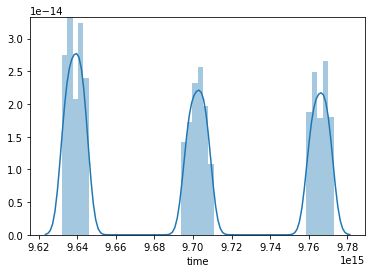

In [12]:
#d['time'].describe()

sns.distplot(d['time'],
            hist=True,
            kde=True)
plt.show()

ValueError: Invalid RGBA argument: 0.0

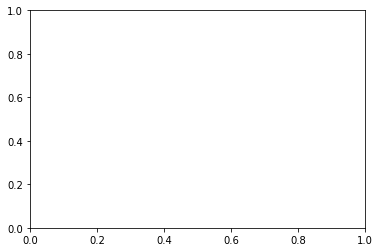

In [54]:

sns.distplot(d['time'],
            hist=True,
            kde=True,
            color=d['outcome'].astype('object'))
plt.show()

## 2.7 country

In [13]:
print(d['country'].nunique())
print('Missing: ', d['country'].isna().sum()/len(d['country']))
d['country'].value_counts().sort_values(ascending=False).reset_index().T

198
Missing:  0.0008794539245590683


,0,1,2,3,4,5,6,7,8,9,...,188,189,190,191,192,193,194,195,196,197
index,in,ng,id,za,ke,us,gh,vn,my,tr,...,ws,gb,zz,gp,tc,gn,gi,mh,er,an
country,645631,352263,174228,155338,151707,140043,118823,90996,87807,84896,...,5,4,4,2,1,1,1,1,1,1


## 2.8 ip

In [14]:
print(d['ip'].nunique())
print(d['ip'].nunique()/len(d['ip']))
d['ip'].value_counts().sort_values(ascending=False).reset_index()[0:100].T

1030950
0.33568049741731637


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
index,224.130.156.216,37.95.134.218,13.31.35.207,155.184.236.45,109.101.133.231,119.88.125.198,105.144.126.10,68.171.95.214,216.197.201.221,230.236.226.213,...,136.111.77.221,188.211.116.106,46.23.145.198,203.57.59.176,69.85.202.86,22.136.132.3,11.139.116.12,69.90.92.141,59.7.182.238,44.241.8.179
ip,37659,37466,32198,16982,16263,15753,14353,13158,9970,9960,...,2166,2136,2127,2105,2090,2059,2054,2053,1994,1969


## 2.9 url

In [15]:
print(d['url'].nunique())
print(d['url'].nunique()/len(d['url']))
d['url'].value_counts().sort_values(ascending=False).reset_index()[0:100].T

663873
0.21615909487552845


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
index,vasstdc27m7nks3,7zyltxp0hh36vpp,q0skvht51258k93,96ky12gxeqflpwz,gavdutxwg0vi1gn,oqknoadbcbcm6so,fezw942t15um898,1bltvi87id7pau1,9tkl0aevixr0p4f,vfq2ojps7euhv04,...,6ofqlkh9s8cyaxl,n0qud3sg3wwgjch,co51dtt0pyag991,walsruxfnnlvfve,8golk6oetcgd6wm,mz2rw4my6viapc9,7mtbxfv50lwxgz5,h995xxvs8pizdxk,j0hirofmqr1uadz,sf4md62w035ql3h
url,1546060,15703,8856,7469,6368,5498,5457,4650,4187,3476,...,757,751,749,746,737,734,728,717,711,709


## 2.10 payment_account

In [16]:
print(d['payment_account'].nunique())
print(d['payment_account'].nunique()/len(d['payment_account']))
d['payment_account'].value_counts().sort_values(ascending=False).reset_index()[0:100].T

1984
0.0006459965147446099


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
index,a3d2de7675556553a5f08e4c88d2c228sezhf,faef6512727719c3dd147a06ba951c947c4fn,a3d2de7675556553a5f08e4c88d2c22817wsw,a04bad750c3144125fb80a399273bfa1wi6hx,a3d2de7675556553a5f08e4c88d2c228b0s7q,a3d2de7675556553a5f08e4c88d2c228x2qy8,a3d2de7675556553a5f08e4c88d2c2285pkzn,32b760348f97730712bf5259e7abe531erkgg,9582a40d50577333f498e3c6f6b0e9cbqvvld,06602d61e71d281961c94a143471a38ei23rd,...,edef5fc426c9ece2aea86fdebb72aa204a3hp,e5c540867562e7461a7ab110794d1772aff1y,4814fdc53f3b70c31b093dab6e3256e18xm6b,fb0351b7c4021ec0358b994a7e2efc5bmnsco,fcc90337693238ed69a24820c75fa136yrqj9,3d35e430674afdbaa3a399b75e330911hnty8,30ed2898be3a25cab16c1b1c1977aba50w18z,a3d2de7675556553a5f08e4c88d2c228864ku,a3d2de7675556553a5f08e4c88d2c2284ef9d,a3d2de7675556553a5f08e4c88d2c228qq9uu
payment_account,515033,236413,192565,161935,84319,73357,66027,58195,54987,51421,...,4546,4429,4415,4353,4289,4184,4056,3989,3989,3976


## 2.11 address

In [17]:
print(d['address'].nunique())
print(d['address'].nunique()/len(d['address']))
d['address'].value_counts().sort_values(ascending=False).reset_index().T

1984
0.0006459965147446099


,0,1,2,3,4,5,6,7,8,9,...,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983
index,a3d2de7675556553a5f08e4c88d2c228nfhse,dd7151709002fc3dce968916d8ec00ede03vc,a3d2de7675556553a5f08e4c88d2c228qg5i2,fcec7ba7b352f0a5e62ca742391e8ab3yylj7,a3d2de7675556553a5f08e4c88d2c228dehmo,a3d2de7675556553a5f08e4c88d2c228tfgez,fa939ec90cd12dfa968446b64984ae84rjmka,43058cc45a1e3e47851faff164c27f0bnp0me,40a05b122142822ca6ac84addc794cca8lt2o,a3d2de7675556553a5f08e4c88d2c228o21d6,...,4313093e51ad9cd071f8912c7ad8429aidkpv,a8b1c637438b418dd73b7c03fa8d86d8y6gid,e9ac7750d73a796460f96b096b29725f9af3c,f83eb9ddf235f43bada7e09f3996e802n1j8m,dee44a87c5db48c9f6ca23e37d6f61074typq,a3d2de7675556553a5f08e4c88d2c228y9o07,384716c12cf6dc17aae1fce671ef5739cal2c,a3d2de7675556553a5f08e4c88d2c228wuzmv,a3d2de7675556553a5f08e4c88d2c228dxeyy,a3d2de7675556553a5f08e4c88d2c228g787t
address,515033,236413,192565,161935,84319,73357,66027,58195,54987,51421,...,1,1,1,1,1,1,1,1,1,1


## 2.12 outcome

In [18]:
print(d['outcome'].nunique())
print(d['outcome'].value_counts()/len(d['outcome']))

2
0.0    0.865716
1.0    0.134284
Name: outcome, dtype: float64


## 2.2 Missing Value Imputation

In [8]:
d['country'].fillna('empty', inplace=True)

In [9]:
d['country'].isna().sum()/len(d)

0.0

## 3. Feature Engineering

## 3.1 # Bids per Bidder

In [10]:
### Total bids for each bidder
tot_bid = d['bidder_id']\
    .value_counts()\
    .reset_index()\
    .rename(columns = {'index':'bidder_id','bidder_id':'tot_bid'})

tot_bid.head()

,bidder_id,tot_bid
0,f5b2bbad20d1d7ded3ed960393bec0f40u6hn,515033
1,197e90906939267ace2422e78e8e83889znqp,236413
2,a58ace8b671a7531c88814bc86b2a34cf0crb,192565
3,9655ccc7c0c193f1549475f02c54dce45kjw7,161935
4,6c8ffec692e88d81e1b18d47818abb04v6llr,84319


## 3.2 # Auctions per Bidder

In [11]:
### Total auctions for each bidder
tot_auc = d\
    .groupby(['bidder_id'])['auction'].nunique()\
    .reset_index().rename(columns = {'auction':'tot_auc'})

tot_auc.head()

,bidder_id,tot_auc
0,001068c415025a009fee375a12cff4fcnht8y,1
1,0030a2dd87ad2733e0873062e4f83954mkj86,1
2,00a0517965f18610417ee784a05f494d4dw6e,74
3,00cc97158e6f4cb8eac3c0075918b7ffi5k8o,3
4,01067975436d123f717ee5aba0dd4bbfa0937,17


## 3.3 Max # Bids in a Country per Bidder

In [12]:
max_bid_ctry_bidder = d\
    .groupby(['country','bidder_id'])['bid_id'].count()\
    .reset_index().rename(columns = {'bid_id':'max_bid_ctry_bidder'})\
    .groupby(['bidder_id'])['max_bid_ctry_bidder'].max().reset_index()

max_bid_ctry_bidder.head()

,bidder_id,max_bid_ctry_bidder
0,001068c415025a009fee375a12cff4fcnht8y,1
1,0030a2dd87ad2733e0873062e4f83954mkj86,1
2,00a0517965f18610417ee784a05f494d4dw6e,83
3,00cc97158e6f4cb8eac3c0075918b7ffi5k8o,2
4,01067975436d123f717ee5aba0dd4bbfa0937,123


## 3.4 # Urls per Bidder

In [13]:
tot_url = d\
    .groupby(['bidder_id'])['url'].nunique()\
    .reset_index().rename(columns = {'url':'tot_url'})

tot_url.head()

,bidder_id,tot_url
0,001068c415025a009fee375a12cff4fcnht8y,1
1,0030a2dd87ad2733e0873062e4f83954mkj86,1
2,00a0517965f18610417ee784a05f494d4dw6e,84
3,00cc97158e6f4cb8eac3c0075918b7ffi5k8o,1
4,01067975436d123f717ee5aba0dd4bbfa0937,4


## 3.5 # Unique Timestamps per Bidder

In [14]:
tot_uni_time = d\
    .groupby(['bidder_id'])['time'].nunique()\
    .reset_index().rename(columns = {'time':'tot_uni_time'})

tot_uni_time.head()

,bidder_id,tot_uni_time
0,001068c415025a009fee375a12cff4fcnht8y,1
1,0030a2dd87ad2733e0873062e4f83954mkj86,1
2,00a0517965f18610417ee784a05f494d4dw6e,141
3,00cc97158e6f4cb8eac3c0075918b7ffi5k8o,3
4,01067975436d123f717ee5aba0dd4bbfa0937,543


## 3.6 # Devices per Bidder


In [15]:
tot_device = d\
    .groupby(['bidder_id'])['device'].nunique()\
    .reset_index().rename(columns={'device':'tot_device'})


tot_device.head()

,bidder_id,tot_device
0,001068c415025a009fee375a12cff4fcnht8y,1
1,0030a2dd87ad2733e0873062e4f83954mkj86,1
2,00a0517965f18610417ee784a05f494d4dw6e,67
3,00cc97158e6f4cb8eac3c0075918b7ffi5k8o,3
4,01067975436d123f717ee5aba0dd4bbfa0937,165


## 3.7 # IPs per Bidder

In [16]:
tot_ip = d\
    .groupby(['bidder_id'])['ip'].nunique()\
    .reset_index().rename(columns = {'ip':'tot_ip'})

tot_ip.head()

,bidder_id,tot_ip
0,001068c415025a009fee375a12cff4fcnht8y,1
1,0030a2dd87ad2733e0873062e4f83954mkj86,1
2,00a0517965f18610417ee784a05f494d4dw6e,103
3,00cc97158e6f4cb8eac3c0075918b7ffi5k8o,3
4,01067975436d123f717ee5aba0dd4bbfa0937,398


## 3.8 # Bids in Merchandise per Bidder

In [17]:
# avg_bid_merc_bidder = d\
#     .groupby(['merchandise','bidder_id'])['bid_id'].count()\
#     .reset_index().rename(columns = {'bid_id':'avg_bid_merc_bidder'})\
#     .groupby(['bidder_id'])['avg_bid_merc_bidder'].mean()\
#     .reset_index()

# avg_bid_merc_bidder.head()

tot_merch = d\
    .groupby(['bidder_id'])['merchandise'].nunique()\
    .reset_index().rename(columns = {'merchandise':'tot_merch'})

tot_merch.head()

,bidder_id,tot_merch
0,001068c415025a009fee375a12cff4fcnht8y,1
1,0030a2dd87ad2733e0873062e4f83954mkj86,1
2,00a0517965f18610417ee784a05f494d4dw6e,1
3,00cc97158e6f4cb8eac3c0075918b7ffi5k8o,1
4,01067975436d123f717ee5aba0dd4bbfa0937,1


## 3.9 Avg # Bids per Auction per Bidder

In [18]:

avg_bid_auction_bidder = d \
    .loc[:, ['bid_id','bidder_id','auction']]\
    .groupby(['auction','bidder_id'])['bid_id'].count()\
    .reset_index().rename(columns={'bid_id':'bids_count_per_bidder_auction'}) \
    .groupby(['bidder_id'])['bids_count_per_bidder_auction'].mean()\
    .reset_index().rename(columns={'bids_count_per_bidder_auction':'avg_bid_auction_bidder'})

avg_bid_auction_bidder.head()

,bidder_id,avg_bid_auction_bidder
0,001068c415025a009fee375a12cff4fcnht8y,1.000000
1,0030a2dd87ad2733e0873062e4f83954mkj86,1.000000
2,00a0517965f18610417ee784a05f494d4dw6e,1.905405
3,00cc97158e6f4cb8eac3c0075918b7ffi5k8o,1.000000
4,01067975436d123f717ee5aba0dd4bbfa0937,31.941176


## 3.10 Avg # Bids per URL per Bidder

In [19]:

avg_bid_url_bidder = d \
    .loc[:, ['bid_id','bidder_id','url']]\
    .groupby(['url','bidder_id'])['bid_id'].count()\
    .reset_index().rename(columns={'bid_id':'bids_count_per_bidder_url'}) \
    .groupby(['bidder_id'])['bids_count_per_bidder_url'].mean()\
    .reset_index().rename(columns={'bids_count_per_bidder_url':'avg_bid_url_bidder'})

avg_bid_url_bidder.head()



,bidder_id,avg_bid_url_bidder
0,001068c415025a009fee375a12cff4fcnht8y,1.000000
1,0030a2dd87ad2733e0873062e4f83954mkj86,1.000000
2,00a0517965f18610417ee784a05f494d4dw6e,1.678571
3,00cc97158e6f4cb8eac3c0075918b7ffi5k8o,3.000000
4,01067975436d123f717ee5aba0dd4bbfa0937,135.750000


In [20]:
dd = d[['bidder_id','outcome']].drop_duplicates()\
    .merge(tot_bid, on='bidder_id', how='inner')\
    .merge(tot_auc, on='bidder_id', how='inner')\
    .merge(max_bid_ctry_bidder, on='bidder_id', how='inner')\
    .merge(tot_url, on='bidder_id', how='inner')\
    .merge(tot_uni_time, on='bidder_id', how='inner')\
    .merge(tot_device, on='bidder_id', how='inner')\
    .merge(tot_ip, on='bidder_id', how='inner')\
    .merge(tot_merch, on='bidder_id', how='inner')\
    .merge(avg_bid_auction_bidder, on='bidder_id', how='inner')\
    .merge(avg_bid_url_bidder, on='bidder_id', how='inner')
dd.shape

(1984, 12)

In [21]:
dd.head()

,bidder_id,outcome,tot_bid,tot_auc,max_bid_ctry_bidder,tot_url,tot_uni_time,tot_device,tot_ip,tot_merch,avg_bid_auction_bidder,avg_bid_url_bidder
0,668d393e858e8126275433046bbd35c6tywop,0.0,19988,594,6924,4527,18961,1029,10316,1,33.649832,4.415286
1,e8291466de91b0eb4e1515143c7f74dexy2yr,0.0,30062,787,4274,295,27969,403,20492,1,38.198221,101.905085
2,a58ace8b671a7531c88814bc86b2a34cf0crb,0.0,192565,748,45027,36518,122781,2020,53405,1,257.439840,5.273153
3,7e34a26c4c339e875997f4b9239d2b5fscng4,0.0,9108,162,8978,1886,8895,367,6046,1,56.222222,4.829268
4,6c8ffec692e88d81e1b18d47818abb04v6llr,0.0,84319,963,12012,13416,68972,1610,27560,1,87.558671,6.284958


## 3.3 Feature Selection

In [24]:
### Feature Selection with RFECV

params = {'n_estimators':100
          , 'max_depth':4
          , 'min_samples_split':4
          , 'learning_rate':.1
          ,'loss':'deviance'}

GB = GradientBoostingClassifier(**params)
selector = RFE(estimator=GB, step=1,verbose=3)
selector.fit(dd[[i for i in dd.columns if i not in ['bidder_id','outcome']]]
             ,dd.loc[:,'outcome'])

Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.


RFE(estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
                                         learning_rate=0.1, loss='deviance',
                                         max_depth=4, max_features=None,
                                         max_leaf_nodes=None,
                                         min_impurity_decrease=0.0,
                                         min_impurity_split=None,
                                         min_samples_leaf=1,
                                         min_samples_split=4,
                                         min_weight_fraction_leaf=0.0,
                                         n_estimators=100,
                                         n_iter_no_change=None, presort='auto',
                                         random_state=None, subsample=1.0,
                                         tol=0.0001, validation_fraction=0.1,
                                         verbose=0, warm_start=False),
    n_features_to_s

In [25]:
var_all = [i for i in dd.columns if i not in ['bidder_id','outcome']]
var_selected = pd.DataFrame(sorted(zip(map(lambda x: round(x), selector.ranking_), var_all)),
                            columns = ['ranking', 'variable'])

print(var_selected)

   ranking                variable
0        1  avg_bid_auction_bidder
1        1      avg_bid_url_bidder
2        1                 tot_bid
3        1              tot_device
4        1                  tot_ip
5        2                 tot_url
6        3                 tot_auc
7        4     max_bid_ctry_bidder
8        5            tot_uni_time
9        6               tot_merch


In [30]:
variables = var_selected.loc[var_selected['ranking']==1,'variable'].to_list()
variables

['avg_bid_auction_bidder',
 'avg_bid_url_bidder',
 'tot_bid',
 'tot_device',
 'tot_ip']

## 4. Model Development

### 4.1 Data Pre-processing

In [31]:

# Data Partition
X_train, X_test, y_train, y_test = train_test_split(dd[var_all]
                                                    ,dd['outcome']
                                                    ,random_state=54
                                                    ,test_size=0.25)

In [32]:
# Scaling
# pipe = Pipeline([
#     #('selector', DataFrameSelector(numeric.columns.tolist())),
#     ('scaler', StandardScaler()),
# ])

#Scaling Numerical columns
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train[variables])
    ,columns=variables
)

X_test_scaled = pd.DataFrame(
    scaler.fit_transform(X_test[variables])
    ,columns=variables
)


### 4.2 Baseline Model: Logistic Regression

In [42]:

#Function attributes
#Algorithm     - Algorithm used 
#training_x    - predictor variables dataframe(training)
#testing_x     - predictor variables dataframe(testing)
#training_y    - target variable(training)
#training_y    - target variable(testing)
#cf - ["coefficients","features"](cooefficients for logistic regression,

#threshold_plot - if True returns threshold plot for model
    
def classifier(algorithm
               ,training_x,testing_x,training_y,testing_y
               ,cf) :
    
    #model
    algorithm.fit(training_x,training_y)
    #predictions   = algorithm.predict(testing_x)
    probabilities = algorithm.predict_proba(testing_x)
    
    #coefficients
    if   cf == "coefficients" :
        coefficients  = pd.DataFrame(algorithm.coef_.ravel())
    elif cf == "features" :
        coefficients  = pd.DataFrame(algorithm.feature_importances_)
        
    coef_sumry = pd.DataFrame(X_train_scaled.columns)\
            .merge(coefficients, left_index= True, right_index= True, how='inner')
    coef_sumry.columns = ["Feature","Importance"]
    coef_sumry.sort_values(by = "Importance",ascending = False)\
        .plot('Feature', 'Importance', kind='bar')
    
    plt.show()

    #model performance 
    roc_auc = roc_auc_score(testing_y,probabilities[:,1]) 
    fpr, tpr, thresholds = roc_curve(testing_y,probabilities[:,1])
    precision, recall, thresholds2 = precision_recall_curve(testing_y, probabilities[:,1])
    
    #fig, ax = plt.subplots(1, 2, sharey=False, sharex=False)

    plt.step(fpr, tpr, label='ROC')
    plt.xlabel('False Positive Rate')
    plt.xlabel('True Positive Rate')
    plt.legend()
    plt.show()
    
    plt.step(recall, precision, label='PRC')
    plt.xlabel('Recall')
    plt.xlabel('Precision')
    plt.legend()
    plt.show()
    
    
    print (algorithm)
    print ("Area under curve : ",roc_auc,"\n")


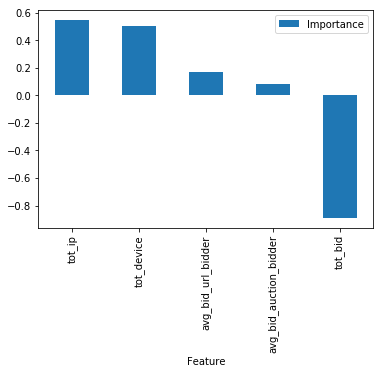

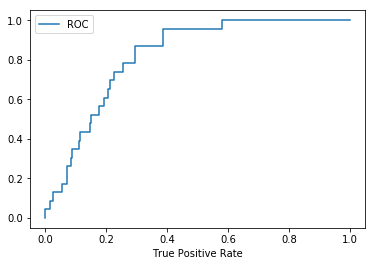

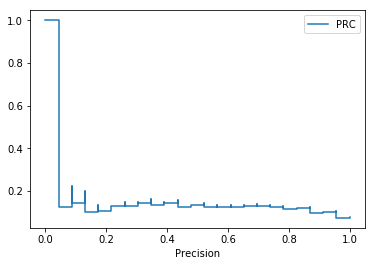

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
Area under curve :  0.8200202224469161 



In [43]:
logit  = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

classifier(logit,X_train_scaled,X_test_scaled,y_train,y_test,"coefficients")

In [46]:
gbm  = GradientBoostingClassifier(
    loss='deviance')

params = {"max_depth" : [3, 5, 10]
          ,"learning_rate" : [0.1, 0.01]
          ,"n_estimators": [100, 200]
         }

gs = GridSearchCV(estimator=gbm
                  ,param_grid=params
                  ,scoring='roc_auc'
                  ,cv=3
                 )

In [48]:
grid_result = gs.fit(X_train, np.ravel(y_train))

print('Best parameters: ',grid_result.best_params_)
print(grid_result.best_estimator_)
print('Best AUC: ', grid_result.best_score_)

Best parameters:  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
Best AUC:  0.8808462404265242


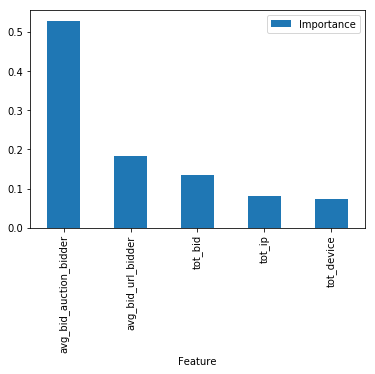

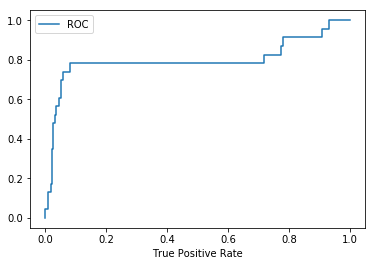

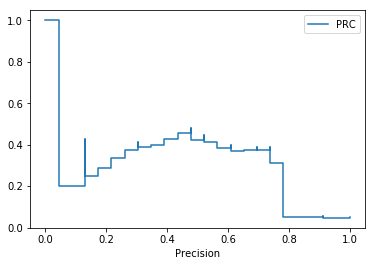

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
Area under curve :  0.7832521371449582 



In [49]:
classifier(grid_result.best_estimator_,X_train_scaled,X_test_scaled,y_train,y_test,"features")

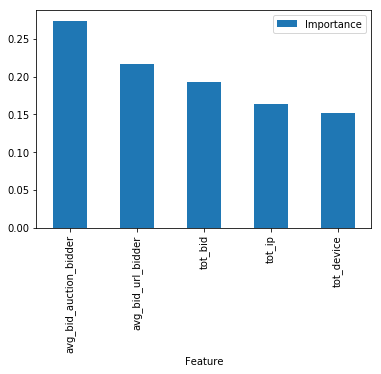

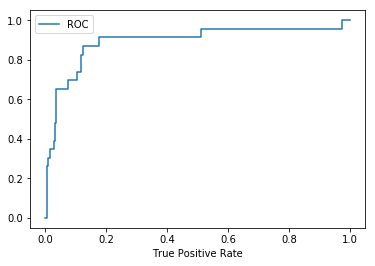

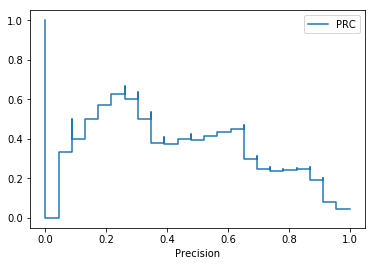

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=50, verbose=0,
                       warm_start=False)
Area under curve :  0.8913043478260869 



In [45]:
rfc = RandomForestClassifier(n_estimators = 200,
                             min_samples_split = 10,
                             #max_depth = 8,
                             n_jobs = -1,
                             criterion = "gini"
                            ,random_state=50)

classifier(rfc,X_train_scaled,X_test_scaled,y_train,y_test,"features")

In [42]:
# lgbm_c = LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
#                         learning_rate=0.5, max_depth=7, min_child_samples=20,
#                         min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
#                         n_jobs=-1, num_leaves=500, objective='binary', random_state=None,
#                         reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
#                         subsample_for_bin=200000, subsample_freq=0)

# #cols = [i for i in telcom.columns if i not in Id_col + target_col]
# telecom_churn_prediction(lgbm_c,X_train_scaled,X_test_scaled,y_train,y_test,
#                          variables,"features",threshold_plot = True)

In [43]:
# xgc = XGBClassifier(n_estimators=300,
#                         learning_rate = 0.01,
#                         max_depth = 2,
#                         objective = 'binary:logistic',
#                         n_jobs = -1)


# telecom_churn_prediction(xgc,X_train,X_test,y_train,y_test,
#                          variables,"features",threshold_plot = True)

### 4.3 Random Forest

In [44]:
# rfc = RandomForestClassifier(n_estimators = 100,
#                                 min_samples_split = 10,
#                                 max_depth = 8,
#                                 n_jobs = -1,
#                              criterion = "gini")

# telecom_churn_prediction(rfc,X_train,X_test,y_train,y_test,
#                          variables,"features",threshold_plot = True)